# Building a CDS Survival Curve

Understand what a CDS survival curve is

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.products.credit.FinCDS import FinCDS
from financepy.products.libor.FinLiborDeposit import FinLiborDeposit
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.market.curves.FinCDSCurve import FinCDSCurve
from financepy.market.curves.FinLiborCurve import FinLiborCurve
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinDate import FinDate

## Build Libor Curve

In [3]:
settlementDate = FinDate(2018, 12, 20)

In [4]:
dcType = FinDayCountTypes.ACT_360
depo1 = FinLiborDeposit(settlementDate, "1M", 0.022009, dcType)
depo2 = FinLiborDeposit(settlementDate, "2M", 0.022138, dcType)
depo3 = FinLiborDeposit(settlementDate, "3M", 0.021810, dcType)
depo4 = FinLiborDeposit(settlementDate, "6M", 0.020503, dcType)
depo5 = FinLiborDeposit(settlementDate, "12M", 0.019930, dcType)
depos = [depo1,depo2,depo3,depo4,depo5]

dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swap1 = FinLiborSwap(settlementDate,"2Y",0.015910,fixedFreq,dcType)
swap2 = FinLiborSwap(settlementDate,"3Y",0.014990,fixedFreq,dcType)
swap3 = FinLiborSwap(settlementDate,"4Y",0.014725,fixedFreq,dcType)
swap4 = FinLiborSwap(settlementDate,"5Y",0.014640,fixedFreq,dcType)
swap5 = FinLiborSwap(settlementDate,"6Y",0.014800,fixedFreq,dcType)
swap6 = FinLiborSwap(settlementDate,"7Y",0.014995,fixedFreq,dcType)
swap7 = FinLiborSwap(settlementDate,"8Y",0.015180,fixedFreq,dcType)
swap8 = FinLiborSwap(settlementDate,"9Y",0.015610,fixedFreq,dcType)
swap9 = FinLiborSwap(settlementDate,"10Y",0.0159880,fixedFreq,dcType)
swap10 = FinLiborSwap(settlementDate,"12Y",0.016430,fixedFreq,dcType)
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, [], swaps)

# Build a CDS Curve

In [5]:
cds1 = FinCDS(settlementDate, "1Y", 0.0200)
cds2 = FinCDS(settlementDate, "2Y", 0.0220)
cds3 = FinCDS(settlementDate, "3Y", 0.0250)
cds4 = FinCDS(settlementDate, "4Y", 0.0275)
cds5 = FinCDS(settlementDate, "5Y", 0.0290)
cds6 = FinCDS(settlementDate, "7Y", 0.0300)
cds7 = FinCDS(settlementDate, "10Y", 0.0310)
cds8 = FinCDS(settlementDate, "15Y", 0.0315)

In [6]:
cdss = [cds1, cds2, cds3, cds4, cds5, cds6, cds7, cds8]

In [7]:
recoveryRate = 0.40

In [8]:
issuerCurve = FinCDSCurve(settlementDate, cdss, liborCurve, recoveryRate)

## Examine the Survival Curve

In [9]:
print(issuerCurve._times)

[ 0.          0.99933743  2.00141276  3.00075019  4.00008761  4.99942504
  7.0008378  10.00158799 15.00101303]


In [10]:
print(issuerCurve._values)

[1.         0.9667627  0.92812846 0.88001739 0.82810946 0.77913327
 0.69647118 0.5852224  0.44200531]


In [11]:
times = np.linspace(0.0,20.0,10)

In [12]:
times

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [13]:
survProbs = issuerCurve.survProb(times)

In [14]:
survProbs

array([1.        , 0.91727655, 0.80596309, 0.70963644, 0.6242339 ,
       0.5498815 , 0.48538685, 0.42845667, 0.37820373, 0.33384487])

Text(0, 0.5, 'Survival Probability')

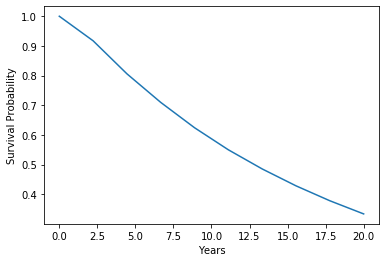

In [15]:
plt.plot(times, survProbs)
plt.xlabel("Years")
plt.ylabel("Survival Probability")

Copyright (c) 2020 Dominic O'Kane